In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler


seed = 331

In [30]:
def resultPlot(x_name, x, fnr, fpr, roc_auc, sensitivities, specificities):
    fig = plt.figure(figsize = (5, 5))

    colors = ['r', 'g', 'b', 'c', 'm']

    plt.plot(x, fnr, color=colors[0], marker='.', label ='FNR')
    plt.plot(x, fpr, color=colors[1], marker='.', label ='FPR')
    plt.plot(x, roc_auc, color=colors[2], marker='.', label ='ROC AUC')
    plt.plot(x, sensitivities, color=colors[3], marker='.', label ='Sensitivity')
    plt.plot(x, specificities, color=colors[4], marker='.', label ='Specificity')

    # # Adding Xticks
    plt.xlabel(x_name, fontweight ='bold', fontsize = 15)
    plt.ylabel('Value', fontweight ='bold', fontsize = 15)
    plt.xticks(x)

    plt.grid()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

In [2]:
def fnr_calc(y_test, y_pred):
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
    return fn / (fn + tp)

def fpr_calc(y_test, y_pred):
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
    return fp / (fp + tn)



def model_metrics(y_test, y_pred):
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1,0]).ravel()
    
    fnr = fn / (fn + tp)
    fpr = fp / (fp + tn)
    
    roc_auc = roc_auc_score(y_test, y_pred)
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tp + tn)
    
    return fnr, fpr, roc_auc, sensitivity, specificity

# Data preparation

In [3]:
dataframe = pd.read_csv("./data/creditcard.csv")

columns = dataframe.columns.drop('Class')

dataframe.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
scaled_dataframe = dataframe.copy().drop(['Class'],axis=1)

transformer = StandardScaler()

transformer.fit(scaled_dataframe)

scaled_dataframe = transformer.transform(scaled_dataframe)
scaled_dataframe = pd.DataFrame(scaled_dataframe, columns=columns)

In [5]:
X = scaled_dataframe
y = dataframe.Class

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=seed, test_size=0.33)

print("train rows: {}, test rows: {}".format(X_train.shape[0], X_test.shape[0]))

train rows: 190820, test rows: 93987


# Testing SVM classifier

In [18]:
svc = SVC(random_state=seed)
# svc = make_pipeline(StandardScaler(), SVC(C=4., kernel='poly', max_iter=1000)) 
svc.fit(X_train, y_train)

svc.score(X_test, y_test)

0.99946801153351

In [19]:
y_pred = svc.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
cm

array([[  108,    49],
       [    1, 93829]], dtype=int64)

In [21]:
fnr, fpr, roc_auc, sensitivity, specificity = model_metrics(y_test, y_pred)

print("FNR = {:.4f}%, FPR = {:.4f}%".format(fnr * 100, fpr * 100))
print("ROC AUC = {:.4f}".format(roc_auc * 100))
print("sensitivity = {:.4f}%, specificity = {:.4f}%".format(sensitivity * 100, specificity * 100))

FNR = 31.2102%, FPR = 0.0011%
ROC AUC = 84.3944
sensitivity = 68.7898%, specificity = 99.8850%


## Testing other SVM settings

In [26]:
kernels = ['linear', 'rbf', 'poly']

fnrs_1 = []
fprs_1 = []
roc_aucs_1 = []
sensitivities_1 = []
specificities_1 = []

for kernel in kernels:
    svc = SVC(kernel=kernel, random_state=seed)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    fnr, fpr, roc_auc, sensitivity, specificity = model_metrics(y_test, y_pred)
    fnrs_1.append(fnr)
    fprs_1.append(fpr)
    roc_aucs_1.append(roc_auc)
    sensitivities_1.append(sensitivity)
    specificities_1.append(specificity)

In [28]:
min_fnr = 100
best_param = 0
for i in range(len(fnrs_1)):
    if (fprs_1[i] * 100 < 0.5 and fnrs_1[i] < min_fnr):
        min_fnr = fnrs_1[i]
        best_param = i
        
print("FNR = {:.4f}%, FPR = {:.4f}%".format(fnrs_1[best_param] * 100, fprs_1[best_param] * 100))
print("ROC AUC = {:.4f}".format(roc_aucs_1[best_param] * 100))
print("sensitivity = {:.4f}%, specificity = {:.4f}%".format(sensitivities_1[best_param] * 100, specificities_1[best_param] * 100))

print("Best kernel = {}".format(kernels[best_param]))

best_p = kernels[best_param]

svc = SVC(kernel=kernel, random_state=seed)
svc.fit(X_train, y_train)
y_pred_best = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best, labels=[1,0])
cm

FNR = 19.1083%, FPR = 0.0181%
ROC AUC = 90.4368
sensitivity = 80.8917%, specificity = 99.8648%
Best kernel = linear


array([[  126,    31],
       [   12, 93818]], dtype=int64)

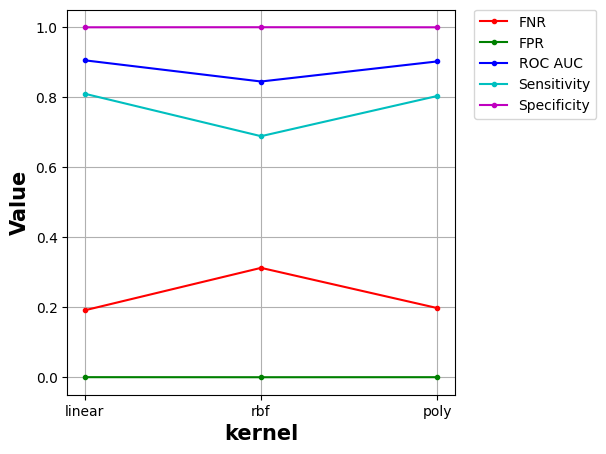

In [31]:
resultPlot('kernel', kernels, fnrs_1, fprs_1, roc_aucs_1, sensitivities_1, specificities_1)

In [34]:
degrees = np.linspace(1,6,6).astype(int)

fnrs_2 = []
fprs_2 = []
roc_aucs_2 = []
sensitivities_2 = []
specificities_2 = []

for degree in degrees:
    svc = SVC(kernel='poly', degree=degree, random_state=seed)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    fnr, fpr, roc_auc, sensitivity, specificity = model_metrics(y_test, y_pred)
    fnrs_2.append(fnr)
    fprs_2.append(fpr)
    roc_aucs_2.append(roc_auc)
    sensitivities_2.append(sensitivity)
    specificities_2.append(specificity)

In [35]:
min_fnr = 100
best_param = 0
for i in range(len(fnrs_2)):
    if (fprs_2[i] * 100 < 0.5 and fnrs_2[i] < min_fnr):
        min_fnr = fnrs_2[i]
        best_param = i
        
print("FNR = {:.4f}%, FPR = {:.4f}%".format(fnrs_2[best_param] * 100, fprs_2[best_param] * 100))
print("ROC AUC = {:.4f}".format(roc_aucs_2[best_param] * 100))
print("sensitivity = {:.4f}%, specificity = {:.4f}%".format(sensitivities_2[best_param] * 100, specificities_2[best_param] * 100))

print("Best degree = {}".format(degrees[best_param]))

best_p = degrees[best_param]

svc = SVC(kernel='poly', degree=best_p, random_state=seed)
svc.fit(X_train, y_train)
y_pred_best = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best, labels=[1,0])
cm

FNR = 18.4713%, FPR = 0.0181%
ROC AUC = 90.7553
sensitivity = 81.5287%, specificity = 99.8637%
Best degree = 1


array([[  128,    29],
       [   17, 93813]], dtype=int64)

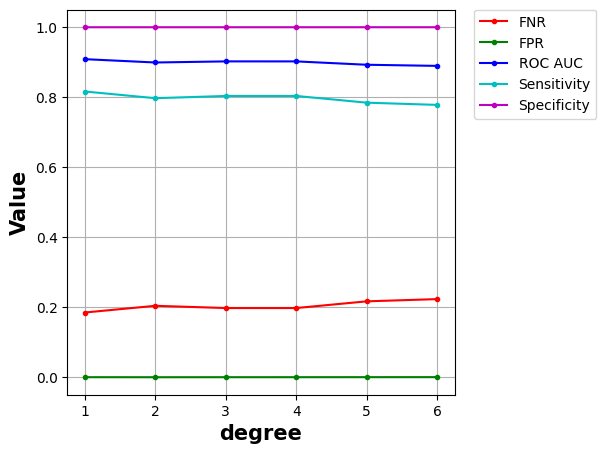

In [39]:
resultPlot('degree', degrees, fnrs_2, fprs_2, roc_aucs_2, sensitivities_2, specificities_2)

In [47]:
cs = [0.1, 1, 10, 100, 1000]

fnrs_3 = []
fprs_3 = []
roc_aucs_3 = []
sensitivities_3 = []
specificities_3 = []

for c in cs:
    svc = SVC(kernel='poly', C=c, random_state=seed)
    svc.fit(X_train,y_train)
    y_pred = svc.predict(X_test)
    fnr, fpr, roc_auc, sensitivity, specificity = model_metrics(y_test, y_pred)
    fnrs_3.append(fnr)
    fprs_3.append(fpr)
    roc_aucs_3.append(roc_auc)
    sensitivities_3.append(sensitivity)
    specificities_3.append(specificity)

In [51]:
min_fnr = 100
best_param = 0
for i in range(len(fnrs_3)):
    if (fprs_3[i] * 100 < 0.5 and fnrs_3[i] < min_fnr):
        min_fnr = fnrs_3[i]
        best_param = i
        
print("FNR = {:.4f}%, FPR = {:.4f}%".format(fnrs_3[best_param] * 100, fprs_3[best_param] * 100))
print("ROC AUC = {:.4f}".format(roc_aucs_3[best_param] * 100))
print("sensitivity = {:.4f}%, specificity = {:.4f}%".format(sensitivities_3[best_param] * 100, specificities_3[best_param] * 100))

print("Best C = {}".format(cs[best_param]))

best_p = cs[best_param]

svc = SVC(kernel='poly', C=best_p, random_state=seed)
svc.fit(X_train, y_train)
y_pred_best = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best, labels=[1,0])
cm

FNR = 19.1083%, FPR = 0.0171%
ROC AUC = 90.4373
sensitivity = 80.8917%, specificity = 99.8648%
Best C = 10


array([[  127,    30],
       [   16, 93814]], dtype=int64)

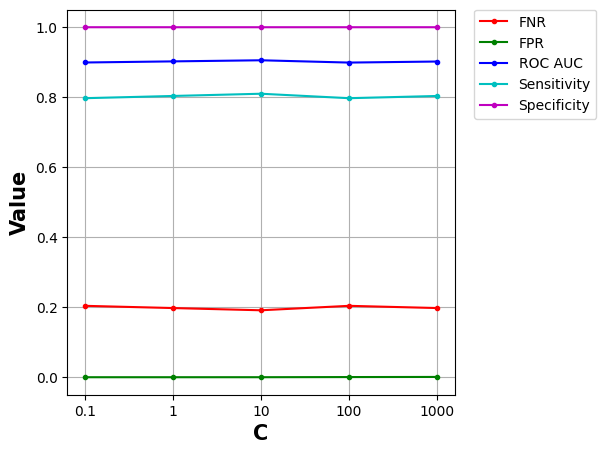

In [50]:
resultPlot('C', ['0.1', '1', '10', '100', '1000'], fnrs_3, fprs_3, roc_aucs_3, sensitivities_3, specificities_3)